In [1]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [16]:
import pandas as pd
data=pd.read_csv("cleaned_data.csv")
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data['LIMIT_BAL'].values.reshape(-1,1),data['default payment next month'].values,test_size=0.2,random_state=24)


(5333,)

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [11]:
from sklearn import linear_model
lr = linear_model.LogisticRegression(C=1e40, solver='liblinear')
model = lr.fit(x_train, y_train)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [6]:
test_predictions=model.predict_proba(x_test)


_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [13]:
from sklearn.metrics import roc_auc_score
lr_auc = roc_auc_score(y_test, test_predictions[:,1])

print('Logistic: ROC AUC=%.3f' % (lr_auc))

Logistic: ROC AUC=0.620


_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0.5, 1.0, 'ROC curve for Logistic Regression')

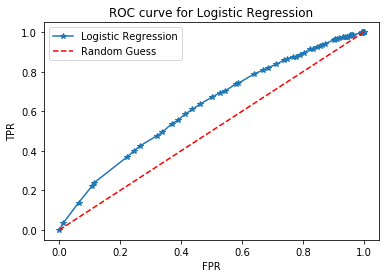

In [18]:
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, thresh = metrics.roc_curve(y_test, test_predictions[:,1])
plt.plot(fpr,tpr,'*-')
plt.plot([0,1],[0,1],'r--')
plt.legend(['Logistic Regression','Random Guess'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for Logistic Regression')

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [19]:
precision,recall,th=metrics.precision_recall_curve(y_test,test_predictions[:,1])

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


(0, 1)

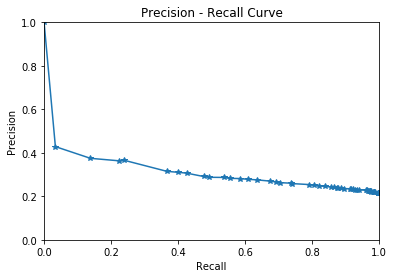

In [20]:
plt.plot(recall,precision,'-*')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision - Recall Curve')
plt.xlim([0,1])
plt.ylim([0,1])

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [21]:
metrics.auc(recall,precision)

0.31566964427378624

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [22]:
train_predictions=model.predict_proba(x_train)
metrics.roc_auc_score(y_train,train_predictions[:,1])

0.6182918113358344

    How is this different, conceptually and quantitatively, from your earlier calculation?
